# JsonOutputParser

- 问题：上一个模型的输出，没有被处理就输入下一个模型
- 上一个模型的输出结果应该作为提示词模板的输入，构建下一个提示词
- 模型输出的 AIMessage 需要转化为字典

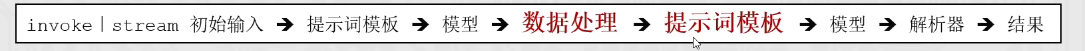

In [1]:
from langchain_core.output_parsers import StrOutputParser, JsonOutputParser
from langchain_community.chat_models.tongyi import ChatTongyi
from langchain_core.prompts import PromptTemplate

In [2]:
# 创建所需的解析器
str_parser = StrOutputParser()
json_parser = JsonOutputParser()

# 模型创建
model = ChatTongyi(model="qwen3-max")

In [3]:
# 第一个提示词模板
first_prompt = PromptTemplate.from_template(
    "我邻居姓：{lastname}，刚生了{gender}，请帮忙起名字，"
    "并封装为JSON格式返回给我。要求key是name，value就是你起的名字，请严格遵守格式要求。"
)

# 第二个提示词模板
second_prompt = PromptTemplate.from_template(
    "姓名：{name}，请帮我解析含义。"
)

In [4]:
# 构建链   （AIMessage("{name: 张若曦}")
chain = first_prompt | model | json_parser | second_prompt | model | str_parser

for chunk in chain.stream({"lastname": "张", "gender": "女儿"}):
    print(chunk, end="", flush=True)

“张若溪”是一个富有诗意和文化内涵的中文名字，我们可以从姓氏、名字的字义、音韵以及整体意境几个方面来解析其含义：

---

### 一、姓氏：“张”
- “张”是中国常见大姓之一，源远流长，出自姬姓，为黄帝后裔所建。
- 在汉字中，“张”本义为“拉开弓弦”，引申为展开、扩张、张扬之意，也象征着积极进取、有张力与活力。

---

### 二、名字：“若溪”

#### 1. “若”字解析：
- **基本含义**：  
  - 作连词时意为“如果”、“好像”；  
  - 作副词时表示“似乎”、“仿佛”；  
  - 在古文中也常用于美称，如“若水”、“若兰”，带有柔美、文雅的意味。
- **文化意象**：  
  “若”字常用于女性名字中，传达出温婉、轻盈、含蓄的气质。例如《楚辞》中有“采芳洲兮杜若”，“若”也指一种香草，象征高洁。

#### 2. “溪”字解析：
- **基本含义**：  
  指山间的小河、小水流，如“清溪”、“溪涧”。
- **文化意象**：  
  “溪”象征清澈、灵动、自然、宁静。在古典诗词中常用来描绘幽静恬淡的山水意境，如王维诗“空山新雨后，天气晚来秋。明月松间照，清泉石上流。”其中“清泉”即类似“溪”的意象。
- **五行属性**：  
  “溪”属水，寓意智慧、柔和、流动不息。

---

### 三、整体意境：“若溪”
- “若溪”可理解为“宛如溪水”或“似溪一般”。
- 整体给人以**清新脱俗、温柔灵动、澄澈宁静**的感觉。
- 名字既有古典诗词的雅致（如“若”字的文言韵味），又有自然山水的清丽（如“溪”字的自然意象），非常适合女孩使用。

---

### 四、音韵美感
- 拼音：Zhāng Ruò Xī  
- 声调：阴平（第一声）— 去声（第四声）— 阴平（第一声）  
- 音律起伏有致，尾音轻柔上扬，读来婉转悦耳，朗朗上口。

---

### 五、综合寓意
“张若溪”一名寓意：
- **品性高洁**：如溪水般清澈纯净；
- **气质温婉**：如“若”字所带的柔美与文雅；
- **心灵宁静**：有山水之趣，不染尘嚣；
- **智慧灵动**：水主智，象征思维敏捷、情感细腻。

---

### 小结
“张若溪”是一个兼具**文化底蕴、自然意象与音韵美感**的优美名字，既传统又不失清新，适合追求诗意与内在修养的家庭为女儿所